<a href="https://colab.research.google.com/github/miftahcoiri354/Python-syntax-docs/blob/main/Sympy_Documentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SymPy Tutorial**
- Preliminaries
- Introduction
- Gotchas
- Basic Operations
- Printing
- Simplification
- Calculus
- Solvers
- Metrices
- Advanced Expression Manipulation


-----
### **0. Preliminaries**


In [ ]:
#change setting to enable the output in unicode
import sympy as sp
sp.init_printing(use_unicode=True)

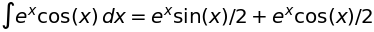

In [ ]:
#Ini adalah contoh memanggil library sympy dan menjalankan sebuah fungsi
from sympy import *
x, y, z = symbols('x y z')
a, b = symbols('a b')
crazy = symbols('unrelated')

a = Integral(cos(x)*exp(x), x)
Eq(a, a.doit())

### **1. Introduction**


In [ ]:
import math
print(math.sqrt(9))
print(math.sqrt(8))
print(sqrt(8))            #imported from sympy
sqrt(8)

3.0
2.8284271247461903
2*sqrt(2)


In [ ]:
x, y = symbols('x y')
expr = x +2*y
expr+1

In [ ]:
diff(sin(x)*exp(x), x)

In [ ]:
integrate(exp(x)*sin(x)+exp(x)*cos(x),x)

In [ ]:
integrate(sin(x**2), (x, -oo, oo))

In [ ]:
limit(sin(x)/x, x, 0)

In [ ]:
solve(x**2-2,x)

In [ ]:
t = symbols('t')
dsolve(Eq(y(t).diff(t,t)-y(t), exp(t)), y(t))

In [ ]:
Matrix([[1,2],[2,2]]).eigenvals()

In [ ]:
nu, z, jn = symbols('nu z jn')
besselj(nu, z).rewrite(jn)

### **2. Gotchas**


##### **2.a Symbols**

In [ ]:
#fungsi expr hanya memanggil nilai x yang ada diatasnya
expr = x + 1
x = 2
print(expr)
x = 'abc'
expr = x + 'def'
print(expr)
#Setiap kali memanggil x, harus mendeklarasikan x nya lagi dengan sysmbols('x')
x = symbols('x')
expr = x + 1
print(expr.subs(x, 3))

x + 1
abcdef
4


##### **2.b Equals Signs** : Eq(), simplify()

In [ ]:
#kita tidak bisa mendeklarasikan persamaan seperti berikut ini, maka dari itu kita perlu menambahkan Eq(statement1, statement2)
x = symbols('x')
print(x + 2 == 4)
Eq(x + 2, 4)

False


In [ ]:
#kita dapat mengeksekusi fungsi 2 persamaan menggunakan simplify()
a = (x+1)**2
b = x**2 + 2*x + 1
c = x**2 - 2*x + 1
print(simplify(a-b))
simplify(a-c)

0


##### **2.c Two Final Notes: ^ and /**

In [ ]:
#fungsi Xor() di sympy
print(True ^ False)
print(True ^ True)
Xor(x,y)

True
False


In [ ]:
#sympy division of two integers gives a rational
from __future__ import division
print(1/3)
print(Integer(1)/Integer(3))
print(Rational(1,3))
x + Rational(1,3)

0.3333333333333333
1/3
1/3


### **3. Basic Operations**

##### **3.a Substitution**

In [ ]:
from sympy import *
x, y, z = symbols("x y z")
expr = cos(x)+1
print(expr.subs(x, 0))
expr.subs(x, y)

2


In [ ]:
expr = x**y
expr = expr.subs(y, x**y)
expr = expr.subs(y, x**x)
expr

In [ ]:
expr = sin(2*x) + cos(2*x)
expand_trig(expr)

In [ ]:
expr.subs(sin(2*x), 2*sin(x)*cos(x))

In [ ]:
expr = x**3 + 4*x*y - z
print(expr.subs([(x, 2), (y, 4), (z,0)]))
expr

40


In [ ]:
expr = x**4 - 4*x**3 + 4*x**2 - 2*x + 3
replacements = [(x**i, y**i) for i in range(5) if i%2 == 0]
expr.subs(replacements)

40


In [ ]:
expr

In [ ]:
replacements

##### **3.b Converting Strings to Sympy Expressions**
- evalf()
- lambdify()

In [ ]:
# Use sympify to convert strings to sympy expression
str_expr = "x**2 + 3*x - 1/2"
expr = sympify(str_expr)
expr

In [ ]:
# How to use evalf()
expr = sqrt(8)
print(expr)
print(expr.evalf())
print(pi.evalf(100))
expr = cos(2*x)
print(expr.evalf(subs={x: 2.4}))
one = cos(1)**2 + sin(1)**2
print((one - 1).evalf())
print((one - 1).evalf(chop=True))

2*sqrt(2)
2.82842712474619
3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068
0.0874989834394464
-0.e-124
0


In [ ]:
# How to use lambdify
import numpy
a = numpy.arange(10)
expr = sin(x)
f = lambdify(x, expr, "numpy")  #works for multiple value in array
print(f(a))
f = lambdify(x, expr, "math")
print(f(0.1))                   #only works if the input is one value
def mysin(x): return x
f = lambdify(x, expr, {"sin":mysin})
print(f(0.1))                   #this is only accurate for small x

[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849]
0.09983341664682815
0.1


### **4. Printing**

In [ ]:
from sympy import init_printing
init_printing()
pprint(Integral(sqrt(1/x), x), use_unicode=False)

  /          
 |           
 |     ___   
 |    / 1    
 |   /  -  dx
 | \/   x    
 |           
/            


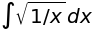

In [ ]:
Integral(sqrt(1/x), x)

In [ ]:
print(pretty(Integral(sqrt(1/x), x), use_unicode=False))

  /          
 |           
 |     ___   
 |    / 1    
 |   /  -  dx
 | \/   x    
 |           
/            


In [ ]:
from sympy.printing.mathml import print_mathml
print_mathml(Integral(sqrt(1/x), x))

<apply>
	<int/>
	<bvar>
		<ci>x</ci>
	</bvar>
	<apply>
		<root/>
		<apply>
			<power/>
			<ci>x</ci>
			<cn>-1</cn>
		</apply>
	</apply>
</apply>



### **5. Simplification**

##### **5.a Simplify** : used to simplify mathematic expressions

In [ ]:
from sympy import *
x, y, z = symbols('x y z')
pprint(simplify(sin(x)**2+cos(x)**2))
pprint(simplify((x**3+x**2-x-1)/(x**2+2*x+1)))
pprint(simplify(gamma(x)/gamma(x-2)))
pprint(simplify(x**2+x*2+1))

1
x - 1
(x - 2)⋅(x - 1)
 2          
x  + 2⋅x + 1


##### **5.b Polynomial/Rational Function Simplification**
- *Expand* : is one of the most common simplification in expanding polynomial expressions. It's make expression bigger, not smaller
- *Factor* : takes a polynomial and factors it into irreducible factors over the rational numbers.opposite with expand, it returns a more structured output.
- *Collect* :common powers of a term in an expression
- *Cancel* : will take any rational function and put it into the standard canonical form, p/q, where p and q are expanded polynomials with no common factors, and the leading coefficients of p and q don't have denominators(i.e. are integers).
- *Apart* : performs a partial fraction decomposition on a rational function.

In [ ]:
pprint(expand((x+1)**2))
pprint(expand((x+2)*(x-3)))
pprint(expand((x+1)*(x-2)-(x-1)*x))

 2          
x  + 2⋅x + 1
 2        
x  - x - 6
-2


In [ ]:
print(factor(x**3-x**2 + x-1))
print(factor(x**2**z+4*x*y*z+4*y**2*z))
print(factor_list(x**2*z + 4*z*y*z + 4*y**2*z))

(x - 1)*(x**2 + 1)
4*x*y*z + x**(2**z) + 4*y**2*z
(1, [(z, 1), (x**2 + 4*y**2 + 4*y*z, 1)])


In [ ]:
#Comparison between factor & expand
pprint(expand((cos(x)+sin(x))**2))
pprint(factor(cos(x)**2+2*cos(x)*sin(x)+sin(x)**2))

   2                           2   
sin (x) + 2⋅sin(x)⋅cos(x) + cos (x)
                 2
(sin(x) + cos(x)) 


In [ ]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
expr

In [ ]:
collect(expr, x)

In [ ]:
#expr.coeff(x,n) gives the coefficient of x**n in expr
collect(expr, x).coeff(x, 2)

x + 1
─────
  x  
3⋅x        
─── - 2    
 2        1
─────── + ─
 x - 4    x
   2          
3⋅x  - 2⋅x - 8
──────────────
     2        
  2⋅x  - 8⋅x  
 2            2
y  - 2⋅y⋅z + z 
───────────────
     x - 1     
       2
(y - z) 
────────
 x - 1  


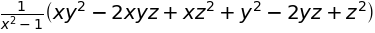

In [ ]:
pprint(cancel((x**2+2*x+1)/(x**2+x)))
expr = 1/x + (3*x/2-2)/(x-4)
pprint(expr)
pprint(cancel(expr))
expr = (x*y**2-2*x*y*z+x*z**2+y**2-2*y*z+z**2)/(x**2-1)
pprint(cancel(expr))
pprint(factor(exprc                                            ))
expr

In [ ]:
expr = (4*x**3+21*x**2+10*x+12)/(x**4+5*x**3+5*x**2+4*x)
pprint(expr)
pprint(apart(expr))

   3       2            
4⋅x  + 21⋅x  + 10⋅x + 12
────────────────────────
  4      3      2       
 x  + 5⋅x  + 5⋅x  + 4⋅x 
 2⋅x - 1       1     3
────────── - ───── + ─
 2           x + 4   x
x  + x + 1            


##### **5.c Trigonometric Simplification**
- *trigsimp*: to simplify expressions using trigonometric identities.
- *expand*: to applies various trigonometric identities to the input expression, and then uses a heuristic to return the "best" one.


In [ ]:
pprint(trigsimp(sin(x)**2+cos(x)**2))
pprint(trigsimp(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4))
pprint(trigsimp(sin(x)*tan(x)/sec(x)))
pprint(trigsimp(cosh(x)**2+sinh(x)**2))
pprint(trigsimp(sinh(x)/tanh(x)))

1
cos(4⋅x)   1
──────── + ─
   2       2
   2   
sin (x)
cosh(2⋅x)
cosh(x)


In [ ]:
pprint(expand_trig(sin(x+y)))
pprint(expand_trig(tan(2*x)))
pprint(trigsimp(sin(x)*cos(y)+sin(y)*cos(x)))

sin(x)⋅cos(y) + sin(y)⋅cos(x)
   2⋅tan(x)  
─────────────
     2       
- tan (x) + 1
sin(x + y)


##### **5.d Powers**
- *powsimp*: applies identities 1 and 2 from above, from left to right.
- *expand_power_exp/expand_power_base*: apply identities 1 and 2 from right to left, respectively.
- *powdenest*: applies identity 3, from left to right.


In [ ]:
a,b,c,z,t = symbols('a b c z t')
print(sqrt(x) == x**Rational(1,2))
pprint(powsimp(x**a*x**b))
pprint(powsimp(x**a*y**a))
pprint(powsimp(t**c*z**c))
pprint(powsimp(t**c*z**c, force=True))

True
 a + b
x     
 a  a
x ⋅y 
 c  c
t ⋅z 
     c
(t⋅z) 


In [ ]:
pprint((z*t)**2)
pprint(powsimp(z**2*t**2))
pprint(sqrt(x*y))
pprint(powsimp(sqrt(x)*sqrt(y)))

 2  2
t ⋅z 
 2  2
t ⋅z 
  _____
╲╱ x⋅y 
√x⋅√y


In [ ]:
pprint(expand_power_exp(x**(a+b)))
pprint(expand_power_base((x*y)**a))
pprint(expand_power_base((z*t)**c))
pprint(expand_power_base((z*t)**c, force=True))
pprint(expand_power_exp(x**5))

 a  b
x ⋅x 
     a
(x⋅y) 
     c
(t⋅z) 
 c  c
t ⋅z 
 5
x 


In [ ]:
print(powdenest((x**a)**b))
print(powdenest((z**a)**b))
powdenest((z**a)**b, force=True)

(x**a)**b
(z**a)**b


##### **5.e Exponential and Logarithms**
- *expand_log*: to apply identities 1 and 2 from left to right, use expand_log(). the identiies will not be applied unless they are valid.
- *logcombine*: to apply identities 1 and 2 from right to left.

In [ ]:
from sympy import symbols,log
x,y,n = symbols("x,y,n",positive=True)
print(log(x*y).expand())
print(log(x/y).expand())
print(log(x**2).expand())
print(log(x**n).expand())
print(log(z*t).expand())
print(log(z**2).expand())
print(log(z*2).expand(force=True)) #Force true to ignore assumption

log(x) + log(y)
log(x) - log(y)
2*log(x)
n*log(x)
log(t*z)
log(z**2)
log(z) + log(2)


In [ ]:
print(logcombine(log(x)+log(y)))
print(logcombine(n*log(z)))
print(logcombine(n*log(z), force=True))

log(x*y)
n*log(z)
log(z**n)


##### **5.f Special Functions**
- *rewrite*: a common way to deal with special function is to rewrite them in terms of one another.
- *expand_func*: to expand special functions in terms of some identities
- *hyperexpand*: also works on the more general Meijer G-function 
- *combsimp*: to simplify combinatorial expressions
- *gammasimp*: to simplify expressions with gamma functions or combinatorial functions with non-integer argument

In [ ]:
k= symbols('k')
pprint(factorial(n))
pprint(gamma(z))
hyper([1, 2], [3], z)

n!
Γ(z)


 ┌─  ⎛1, 2 │  ⎞
 ├─  ⎜     │ z⎟
2╵ 1 ⎝ 3   │  ⎠

In [ ]:
binomial(n,k)

In [ ]:
pprint(tan(x).rewrite(sin))
pprint(factorial(x).rewrite(gamma))

     2   
2⋅sin (x)
─────────
 sin(2⋅x)
Γ(x + 1)


In [ ]:
expand_func(gamma(x+3))

In [ ]:
hyperexpand(hyper([1,1],[2],z))

In [ ]:
meijerg([[1],[1]], [[1],[]], -z)

╭─╮1, 1 ⎛1  1 │   ⎞
│╶┐     ⎜     │ -z⎟
╰─╯2, 1 ⎝1    │   ⎠

In [ ]:
hyperexpand(meijerg([[1],[1]], [[1],[]], -z))

In [ ]:
combsimp(factorial(n)/factorial(n-3))

In [ ]:
pprint(combsimp(binomial(n+1, k+1)/binomial(n, k)))

n + 1
─────
k + 1


In [ ]:
pprint(gamma(gamma(x)*gamma(1-x)))

Γ(Γ(x)⋅Γ(-x + 1))


##### **5.g Continued Fractions**

In [ ]:
def list_to_frac(l): 
  expr = Integer(0)
  for i in reversed(l[1:]):
    expr += i
    expr = 1/expr
  return l[0]+expr
pprint(list_to_frac([x,y,z]))
pprint(list_to_frac([1,2,3,4]))

      1  
x + ─────
        1
    y + ─
        z
43
──
30


In [ ]:
syms = symbols ('a0:5')
print(syms)
a0,a1,a2,a3,a4 = syms
frac = list_to_frac(syms)
pprint(frac)
pprint(cancel(frac))

(a0, a1, a2, a3, a4)
             1        
a₀ + ─────────────────
               1      
     a₁ + ────────────
                  1   
          a₂ + ───────
                    1 
               a₃ + ──
                    a₄
a₀⋅a₁⋅a₂⋅a₃⋅a₄ + a₀⋅a₁⋅a₂ + a₀⋅a₁⋅a₄ + a₀⋅a₃⋅a₄ + a₀ + a₂⋅a₃⋅a₄ + a₂ + a₄
─────────────────────────────────────────────────────────────────────────
                 a₁⋅a₂⋅a₃⋅a₄ + a₁⋅a₂ + a₁⋅a₄ + a₃⋅a₄ + 1                 


                        -(a₂⋅a₃⋅a₄ + a₂ + a₄)                        
─────────────────────────────────────────────────────────────────────
a₀⋅a₂⋅a₃⋅a₄ + a₀⋅a₂ + a₀⋅a₄ - a₁⋅a₂⋅a₃⋅a₄ - a₁⋅a₂ - a₁⋅a₄ - a₃⋅a₄ - 1
                                     1                                     
───────────────────────────────────────────────────────────────────────────
                                a₂⋅a₃⋅a₄ + a₂ + a₄                         
-a₀ - ─────────────────────────────────────────────────────────────────────
      a₀⋅a₂⋅a₃⋅a₄ + a₀⋅a₂ + a₀⋅a₄ - a₁⋅a₂⋅a₃⋅a₄ - a₁⋅a₂ - a₁⋅a₄ - a₃⋅a₄ - 1
                                               a₂⋅a₃⋅a₄ + a₂ + a₄             
──────────────────────────────────────────────────────────────────────────────
   ⎛  2              2        2                                               
a₀⋅⎝a₀ ⋅a₂⋅a₃⋅a₄ + a₀ ⋅a₂ + a₀ ⋅a₄ - a₀⋅a₁⋅a₂⋅a₃⋅a₄ - a₀⋅a₁⋅a₂ - a₀⋅a₁⋅a₄ - a₀

                                    1 
───────────────────────────────── - ──
               

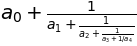

In [ ]:
l = []
frac = apart(frac, a0)
pprint(frac)
l.append(a0)
frac = 1/(frac-a0)
pprint(frac)
frac = apart(frac, a1)
pprint(frac)
l.append(a1)
frac =  1/(frac-a1)
frac = apart(frac, a2)
pprint(frac)
l.append(a2)
frac = 1/(frac-a2)
frac = apart(frac, a3)
pprint(frac)
l.append(a3)
frac = 1/(frac-a3)
frac = apart(frac, a4)
pprint(frac)
l.append(a4)
list_to_frac(l)

In [ ]:
import random
l = list(symbols('a0:5'))
random.shuffle(l)
orig_frac = frac = cancel(list_to_frac(l))
del l

In [ ]:
pprint(orig_frac)

a₀⋅a₁⋅a₂⋅a₃⋅a₄ + a₀⋅a₁⋅a₂ + a₀⋅a₁⋅a₄ + a₁⋅a₂⋅a₃ + a₁ + a₂⋅a₃⋅a₄ + a₂ + a₄
─────────────────────────────────────────────────────────────────────────
                 a₀⋅a₁⋅a₃⋅a₄ + a₀⋅a₁ + a₁⋅a₃ + a₃⋅a₄ + 1                 


### **6. Calculus**

##### **6.a Derivatives**

In [ ]:
print(diff(cos(x), x))
diff(exp(x**2),x)

-sin(x)


In [ ]:
pprint(diff(x**4, x, x,x))
pprint(diff(x**4, x, 3))
expr = exp(x*y*z)
diff(expr, x,y,y,z,z,z,z)

24⋅x
24⋅x


In [ ]:
diff(expr, x,y,2,z,4)

In [ ]:
diff(expr,x,y,y,z,4)

In [ ]:
expr.diff(x,y,y,z,4)

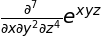

In [ ]:
deriv = Derivative(expr, x,y,y,z,4)
deriv

In [ ]:
deriv.doit()

##### **6.b Integral**

sin(x)
1
π


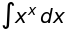

In [ ]:
print(integrate(cos(x), x))
print(integrate(exp(-x),(x,0,oo)))
pprint(integrate(exp(-x**2-y**2),(x, -oo, oo), (y,-oo,oo)))
expr = integrate(x**x,x)
expr

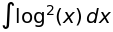

In [ ]:
expr = Integral(log(x)**2,x)
expr

In [ ]:
expr.doit()

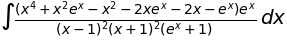

In [ ]:
integ = Integral((x**4+x**2*exp(x)-x**2-2*x*exp(x)-2*x-exp(x))*exp(x)/((x-1)**2*(x+1)**2*(exp(x)+1)),x)
integ

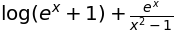

In [ ]:
integ.doit()

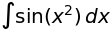

In [ ]:
integ = Integral(sin(x**2), x)
integ

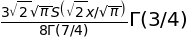

In [ ]:
integ.doit()

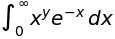

In [ ]:
integ = Integral(x**y*exp(-x),(x,0,oo))
integ

In [ ]:
integ.doit()

⎧ Γ(y + 1)    for -re(y) < 1
⎪                           
⎪∞                          
⎪⌠                          
⎨⎮  y  -x                   
⎪⎮ x ⋅ℯ   dx    otherwise   
⎪⌡                          
⎪0                          
⎩                           

##### **6.c Limits**

1
nan
0


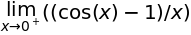

In [ ]:
print(limit(sin(x)/x,x,0))
expr = x**2/exp(x)
print(expr.subs(x,oo))
print(limit(expr, x, oo))
expr = Limit((cos(x)-1)/x,x,0)
expr

In [ ]:
expr.doit()

In [ ]:
limit(1/x,x,0,'+')

In [ ]:
limit(1/x,x,0,'-')

##### **6.d Series Expansion**

In [ ]:
expr = exp(sin(x))
expr.series(x,0,4)

In [ ]:
x+x**3+x**6+O(x**4)

In [ ]:
x*O(1)

In [ ]:
expr.series(x,0,4).removeO()

In [ ]:
exp(x-6).series(x,x0=6)

##### **6.e Finite Differences**

In [ ]:
f,g = symbols('f g', cls=Function)
differentiate_finite(f(x)*g(x))

In [ ]:
f=Function('f')
dfdx=f(x).diff(x)
dfdx.as_finite_difference()

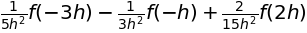

In [ ]:
f = Function('f')
d2fdx2 = f(x).diff(x,2)
h = Symbol('h')
d2fdx2.as_finite_difference([-3*h,-h,2*h])

In [ ]:
finite_diff_weights(2,[-3,-1,2],0)[-1][-1]

In [ ]:
x_list = [-3,1,2]
y_list = symbols('a b c')
apply_finite_diff(1, x_list, y_list, 0)

### **7. Solver**

##### **7.a note about Equations**

In [ ]:
pprint(Eq(x,y))
pprint(solveset(Eq(x**2,1),x))
pprint(solveset(Eq(x**2-1,0),x))
pprint(solveset(x**2-1,x))

x = y
{-1, 1}
{-1, 1}
{-1, 1}


##### **7.b Solving Equations Algebraically**

In [ ]:
pprint(solveset(x**2-x,x))
pprint(solveset(x-x,x,domain=S.Reals))
solveset(sin(x)-1,x,domain=S.Reals)

{0, 1}
ℝ


In [ ]:
pprint(solveset(exp(x),x))
pprint(solveset(cos(x)-x,x))

∅
{x | x ∊ ℂ ∧ -x + cos(x) = 0}


In [ ]:
#List of Equations Form
pprint(linsolve([x+y+z-1,x+y+2*z-3], (x,y,z)))
#Augmented Matrix Form
pprint(linsolve(Matrix(([1,1,1,1],[1,1,2,3])),(x,y,z)))
#A*x = b Form
M = Matrix(((1,1,1,1),(1,1,2,3)))
system =  A,b = M[:, :-1], M[:,-1]
pprint(linsolve(system,x,y,z))

{(-y - 1, y, 2)}
{(-y - 1, y, 2)}
{(-y - 1, y, 2)}


In [ ]:
# 1. When only real solution is present
print('1. When only real solution is present')
a,b,c,d = symbols('a, b, c, d', real=True)
pprint(nonlinsolve([a**2+a,a-b], [a,b]))
pprint(nonlinsolve([x*y-1,x-2],x,y))
# 2. When only complex solution is present
print('2. When only complex solution is present')
pprint(nonlinsolve([x**2+1, y**2+1],[x,y]))
# 3. When both real and complex solution are present
print('3. When both real and complex solution are present')
system = [x**2-2*y**2-2,x*y-2]
vars = [x,y]
pprint(nonlinsolve(system, vars))
system = [exp(x)-sin(y),1/y-3]
pprint(nonlinsolve(system, vars))
# 4. When the system is positive-dimensional system (has infinitely many solutions)
print('4. When the system is positive-dimensional system (has infinitely many solutions)')
pprint(nonlinsolve([x*y,x*y-x],[x,y]))
system = [a**2 + a*c, a-b]
pprint(nonlinsolve(system, [a,b]))

1. When only real solution is present
{(-1, -1), (0, 0)}
{(2, 1/2)}
2. When only complex solution is present
{(-ⅈ, -ⅈ), (-ⅈ, ⅈ), (ⅈ, -ⅈ), (ⅈ, ⅈ)}
3. When both real and complex solution are present
{(-2, -1), (2, 1), (-√2⋅ⅈ, √2⋅ⅈ), (√2⋅ⅈ, -√2⋅ⅈ)}
{(log(sin(1/3)), 1/3), ({2⋅n⋅ⅈ⋅π + (log(sin(1/3)) mod 2⋅ⅈ⋅π) | n ∊ ℤ}, 1/3)}
4. When the system is positive-dimensional system (has infinitely many solutions)
{(0, y)}
{(0, 0), (-c, -c)}


In [ ]:
solve([x**2 - y**2/exp(x)],[x,y], dict=True)

In [ ]:
solve([sin(x+y),cos(x-y)],[x,y])

In [ ]:
pprint(solveset(x**3-6*x**2+9*x,x))
pprint(roots(x**3-6*x**2+9*x,x))
pprint(solve(x*exp(x)-1,x))

{0, 3}
{0: 1, 3: 2}
[LambertW(1)]


##### **7.c Solving Differential Equations**

f(x)
d       
──(f(x))
dx      


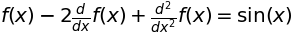

In [ ]:
f, g = symbols('f g', cls=Function)
pprint(f(x))
pprint(f(x).diff(x))
diffeq = Eq(f(x).diff(x,x)-2*f(x).diff(x)+f(x),sin(x))
diffeq

In [ ]:
pprint(dsolve(diffeq, f(x)))
pprint(dsolve(f(x).diff(x)*(1-sin(f(x)))-1, f(x)))

                    x   cos(x)
f(x) = (C₁ + C₂⋅x)⋅ℯ  + ──────
                          2   
-x + f(x) + cos(f(x)) = C₁


### **8. Matrices**

In [ ]:
pprint(Matrix([[1,-1],[3,4],[0,2]]))
pprint(Matrix([1,2,3]))
M = Matrix([[1,2,3],[3,2,1]])
N = Matrix([0,1,1])
pprint(M*N)

⎡1  -1⎤
⎢     ⎥
⎢3  4 ⎥
⎢     ⎥
⎣0  2 ⎦
⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦
⎡5⎤
⎢ ⎥
⎣3⎦


##### **8.a Basic Operations**
- *Shape*
- *Accesing Rows and Columns*
- *Deleting and Inserting Rows and Columns*


In [ ]:
M = Matrix([[1,2,3],[-2,0,4]])
M.shape

In [ ]:
M.row(0)

[1  2  3]

In [ ]:
M.col(-1)

⎡3⎤
⎢ ⎥
⎣4⎦

In [ ]:
M.col_del(0)
M

⎡2  3⎤
⎢    ⎥
⎣0  4⎦

In [ ]:
M.row_del(1)
M

[2  3]

In [ ]:
M = M.row_insert(1, Matrix([[0,4]]))
M = M.col_insert(0, Matrix([1,-2]))

In [ ]:
M

⎡1   2  3⎤
⎢        ⎥
⎣-2  0  4⎦

##### **8.b Basic Methods**

In [ ]:
M = Matrix([[1,3],[-2,3]])
N = Matrix([[0,3],[0,7]])
M+N

⎡1   6 ⎤
⎢      ⎥
⎣-2  10⎦

In [ ]:
M*N

⎡0  24⎤
⎢     ⎥
⎣0  15⎦

In [ ]:
3*M

⎡3   9⎤
⎢     ⎥
⎣-6  9⎦

In [ ]:
M**2

⎡-5  12⎤
⎢      ⎥
⎣-8  3 ⎦

In [ ]:
M**-1

⎡1/3  -1/3⎤
⎢         ⎥
⎣2/9  1/9 ⎦

In [ ]:
M

⎡1   3⎤
⎢     ⎥
⎣-2  3⎦

In [ ]:
M.T

⎡1  -2⎤
⎢     ⎥
⎣3  3 ⎦

##### **8.c Matrix Constructors**

In [ ]:
eye(3)

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [ ]:
zeros(2,3)

⎡0  0  0⎤
⎢       ⎥
⎣0  0  0⎦

In [ ]:
ones(3,2)

⎡1  1⎤
⎢    ⎥
⎢1  1⎥
⎢    ⎥
⎣1  1⎦

In [ ]:
diag(1,2,3)

⎡1  0  0⎤
⎢       ⎥
⎢0  2  0⎥
⎢       ⎥
⎣0  0  3⎦

In [ ]:
diag(-1, ones(2,2), Matrix([5,7,5]))

⎡-1  0  0  0⎤
⎢           ⎥
⎢0   1  1  0⎥
⎢           ⎥
⎢0   1  1  0⎥
⎢           ⎥
⎢0   0  0  5⎥
⎢           ⎥
⎢0   0  0  7⎥
⎢           ⎥
⎣0   0  0  5⎦

##### **8.d Advanced Methods**
- *Determinant*
- *RREF*
- *Nullspace*
- *Columnspace*
- *Eigenvalues, Eigenvectors, and Diagonalization*


In [ ]:
M =  Matrix([[1,0,1],[2,-1,3],[4,3,2]])
M

⎡1  0   1⎤
⎢        ⎥
⎢2  -1  3⎥
⎢        ⎥
⎣4  3   2⎦

In [ ]:
M.det()

In [ ]:
M.rref()

⎛⎡1  0  0⎤           ⎞
⎜⎢       ⎥           ⎟
⎜⎢0  1  0⎥, (0, 1, 2)⎟
⎜⎢       ⎥           ⎟
⎝⎣0  0  1⎦           ⎠

In [ ]:
M = Matrix([[1,2,3,0,0],[4,10,0,0,1]])
M.nullspace()

⎡⎡-15⎤  ⎡0⎤  ⎡ 1  ⎤⎤
⎢⎢   ⎥  ⎢ ⎥  ⎢    ⎥⎥
⎢⎢ 6 ⎥  ⎢0⎥  ⎢-1/2⎥⎥
⎢⎢   ⎥  ⎢ ⎥  ⎢    ⎥⎥
⎢⎢ 1 ⎥, ⎢0⎥, ⎢ 0  ⎥⎥
⎢⎢   ⎥  ⎢ ⎥  ⎢    ⎥⎥
⎢⎢ 0 ⎥  ⎢1⎥  ⎢ 0  ⎥⎥
⎢⎢   ⎥  ⎢ ⎥  ⎢    ⎥⎥
⎣⎣ 0 ⎦  ⎣0⎦  ⎣ 1  ⎦⎦

In [ ]:
M.columnspace()

⎡⎡1⎤  ⎡2 ⎤⎤
⎢⎢ ⎥, ⎢  ⎥⎥
⎣⎣4⎦  ⎣10⎦⎦

In [ ]:
M = Matrix([[3,-2,4,-2],[5,3,-3,-2],[5,-2,2,-2],[5,-2,-3,3]])
M.eigenvals()

In [ ]:
M.eigenvects()

⎡⎛       ⎡⎡0⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞  ⎛      ⎡⎡1⎤  ⎡0 ⎤⎤⎞⎤
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟⎥
⎢⎜       ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥  ⎢-1⎥⎥⎟⎥
⎢⎜-2, 1, ⎢⎢ ⎥⎥⎟, ⎜3, 1, ⎢⎢ ⎥⎥⎟, ⎜5, 2, ⎢⎢ ⎥, ⎢  ⎥⎥⎟⎥
⎢⎜       ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥  ⎢0 ⎥⎥⎟⎥
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟⎥
⎣⎝       ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣0⎦  ⎣1 ⎦⎦⎠⎦

In [ ]:
P, D = M.diagonalize()
P

⎡0  1  1  0 ⎤
⎢           ⎥
⎢1  1  1  -1⎥
⎢           ⎥
⎢1  1  1  0 ⎥
⎢           ⎥
⎣1  1  0  1 ⎦

In [ ]:
D

⎡-2  0  0  0⎤
⎢           ⎥
⎢0   3  0  0⎥
⎢           ⎥
⎢0   0  5  0⎥
⎢           ⎥
⎣0   0  0  5⎦

In [ ]:
P*D*P**-1

⎡3  -2  4   -2⎤
⎢             ⎥
⎢5  3   -3  -2⎥
⎢             ⎥
⎢5  -2  2   -2⎥
⎢             ⎥
⎣5  -2  -3  3 ⎦

In [ ]:
P*D*P**-1==M

True

##### **8.e Possible Issues** FAIL
- *Zero Testing*


In [ ]:
q = Symbol("q", positive=True)
m =Matrix([[-2*cosh(q/3),      exp(-q),            1],
           [      exp(q), -2*cosh(q/3),            1],
           [           1,            1, -2*cosh(q/3)]])
m.nullspace()

### **9. Advanced Expression Manipulation**

##### **9.a Understanding Expression Trees**

In [ ]:
expr = x**2 + x*y
srepr(expr)

"Add(Pow(Symbol('x'), Integer(2)), Mul(Symbol('x'), Symbol('y')))"

In [ ]:
srepr(x**2)

"Pow(Symbol('x'), Integer(2))"

In [ ]:
Pow(x,2)

In [ ]:
srepr(x*y)

"Mul(Symbol('x'), Symbol('y'))"

In [ ]:
Mul(x,y)

In [ ]:
Add(Pow(x,2),Mul(x,y))

In [ ]:
srepr(sin(x*y)/2 - x**2+1/y)

"Add(Mul(Integer(-1), Pow(Symbol('x'), Integer(2))), Mul(Rational(1, 2), sin(Mul(Symbol('x'), Symbol('y')))), Pow(Symbol('y'), Integer(-1)))"

In [ ]:
srepr(x-y)

"Add(Symbol('x'), Mul(Integer(-1), Symbol('y')))"

In [ ]:
expr = x/y
srepr(expr)

"Mul(Symbol('x'), Pow(Symbol('y'), Integer(-1)))"

##### **9.b Recursing through an Expression Tree**
- *func*
- *args*
- *Walking the Tree*

In [ ]:
expr = Add(x,x)
expr.func

sympy.core.mul.Mul

In [ ]:
expr

In [ ]:
expr = 3*y**2*x
expr.args

In [ ]:
expr

In [ ]:
expr.args[2].args

In [ ]:
def pre(expr): 
  print(expr) 
  for arg in expr.args: pre(arg)

expr = x*y+1
pre(expr)

x*y + 1
1
x*y
x
y


In [ ]:
for arg in preorder_traversal(expr): print(arg)

x*y + 1
1
x*y
x
y


##### **9.c Prevent expression evaluation**

In [ ]:
from sympy import Add, UnevaluatedExpr, latex

pprint(Add(x,x))
pprint(Add(x,x, evaluate=False))
pprint(sympify("x + x", evaluate=False))
expr = Add(x,x, evaluate=False)
pprint(expr)
pprint(expr+x)
expr = x + UnevaluatedExpr(x)
pprint(expr)
pprint(x+expr)
uexpr = UnevaluatedExpr(S.One*5/7)*UnevaluatedExpr(S.One*3/4)
pprint(uexpr)
pprint(x*UnevaluatedExpr(1/x))
expr1 = UnevaluatedExpr(x+x)
pprint(expr1)
expr2 = sympify('x+x',evaluate=False)
pprint(expr2)
pprint(UnevaluatedExpr(sympify("x+x",evaluate=False))+y)
uexpr = UnevaluatedExpr(S.One*5/7)*UnevaluatedExpr(S.One*3/4)
pprint(latex(uexpr))
pprint(latex(uexpr.doit()))

2⋅x
x + x
x + x
x + x
3⋅x
x + x
2⋅x + x
5/7⋅3/4
  1
x⋅─
  x
2⋅x
x + x
y + x + x
\frac{5}{7} \frac{3}{4}
\frac{15}{28}
